# Wang2020-A results analysis
Notebook to analyze the results of the Wang2020-A detector.
This detector corresponds to the entry [81]-A of the paper's bibliography.
**Complete**: we analyze all the samples from all the datasets.

## Libraries import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
import glob
import matplotlib as mpl
import seaborn
mpl.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
mpl.rcParams.update(pgf_with_rc_fonts)
import matplotlib.pyplot as plt
fontsize = 18
plt.rc('text', usetex=True)
plt.rc('font', family='sans',size=fontsize)
plt.rc('legend',fontsize=fontsize)
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)
plt.rc('axes',labelsize=fontsize,titlesize=fontsize)
plt.rc('lines',linewidth=2)
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

## Helpers

In [2]:
# Labels for plots
dataset_labels = {'imagenet': 'Imagenet', 'lsun': 'LSUN', 'coco': 'COCO', 
                  'ffhq': 'FFHQ', 'laion': 'LAION', 'raise': 'RAISE', 'celeba': 'CelebA', 'average': 'Average'}

## Execution params

In [6]:
results_dir = '/nas/public/exchange/JPEG-AI/code/results/Wang2020-A'

## Load results
We have results for different sets of images, namely:
1. pristine images;
2. pristine images compressed with JPEG AI;
3. pristine images compressed with JPEG;
4. pristine images with augmentations;
5. synthetic images;
6. synthetic images compressed with JPEG AI;
7. synthetic images compressed with JPEG;
8. synthetic images with augmentations.

In [4]:
# Pristine ("real") samples
results_pristine = pd.read_csv(os.path.join(results_dir, 'real.csv'), index_col=[0, 1])
results_pristine_jpegai = pd.read_csv(os.path.join(results_dir, 'real_JPEGAI.csv'), index_col=[0, 1])
results_pristine_jpeg = pd.read_csv(os.path.join(results_dir, 'real_JPEG.csv'), index_col=[0, 1])
# Synthetic samples
results_synthetic = pd.read_csv(os.path.join(results_dir, 'synthetic.csv'), index_col=[0, 1])
results_synthetic_jpegai = pd.read_csv(os.path.join(results_dir, 'synthetic_JPEGAI.csv'), index_col=[0, 1])
results_synthetic_jpeg = pd.read_csv(os.path.join(results_dir, 'synthetic_JPEG.csv'), index_col=[0, 1])

## Let's plot the distribution scores focusing on the single datasets
We are going to plot the distribution scores for each dataset considering separately the case of pristine and synthetic images and the effects of JPEG and JPEG AI compression.

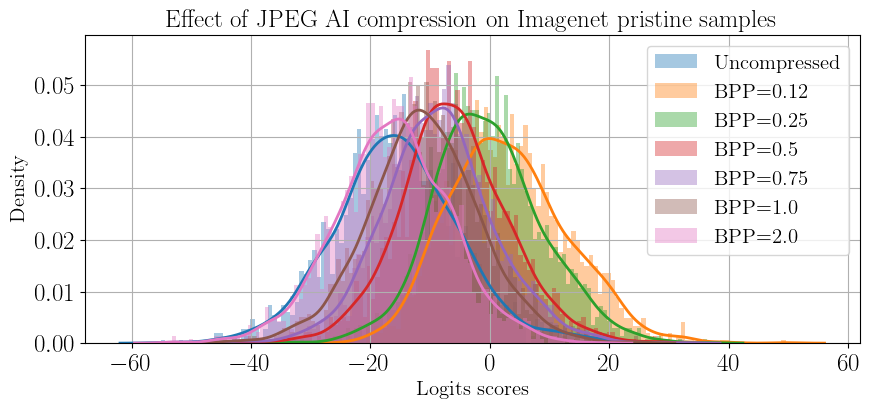

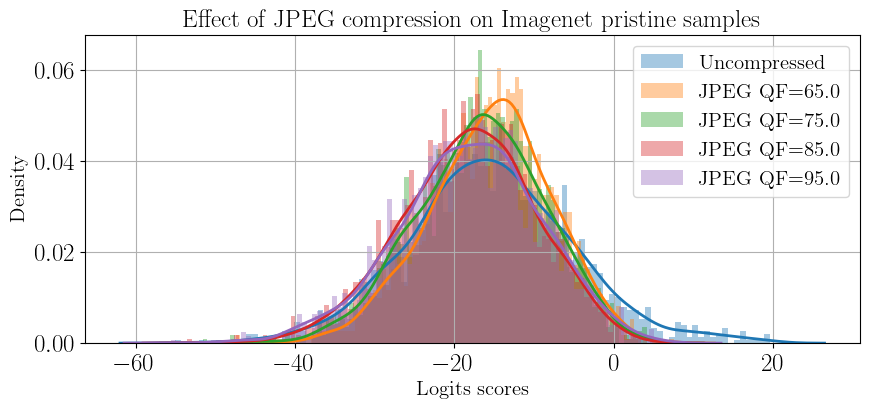

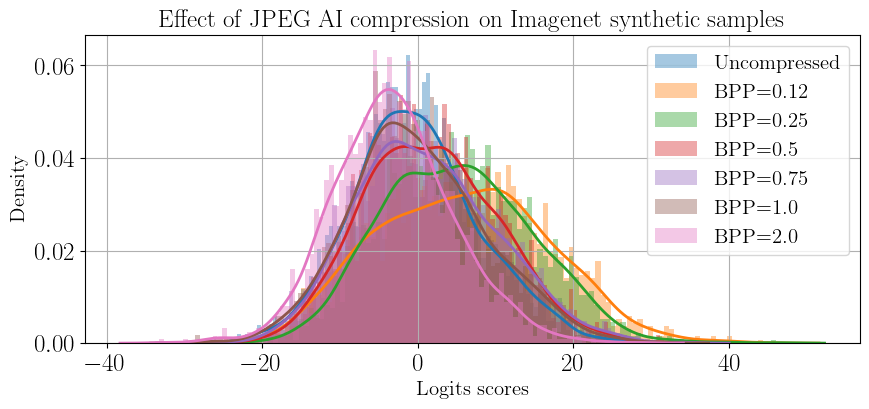

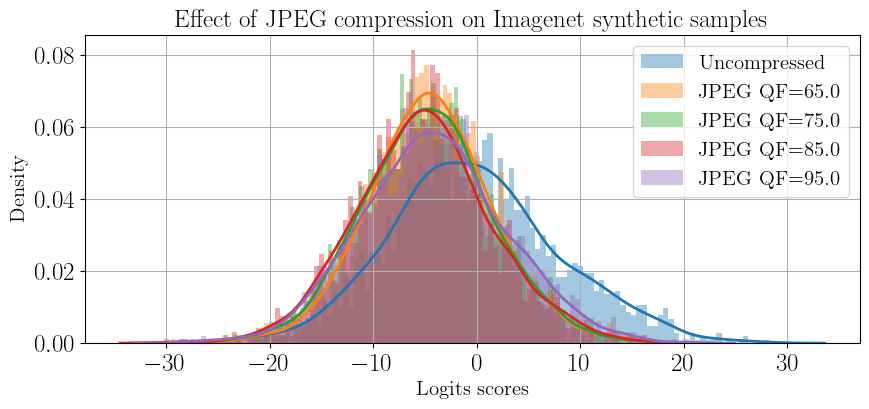

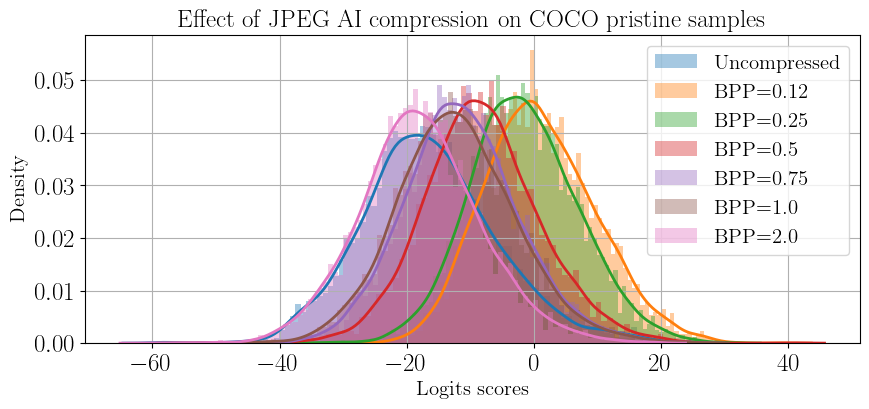

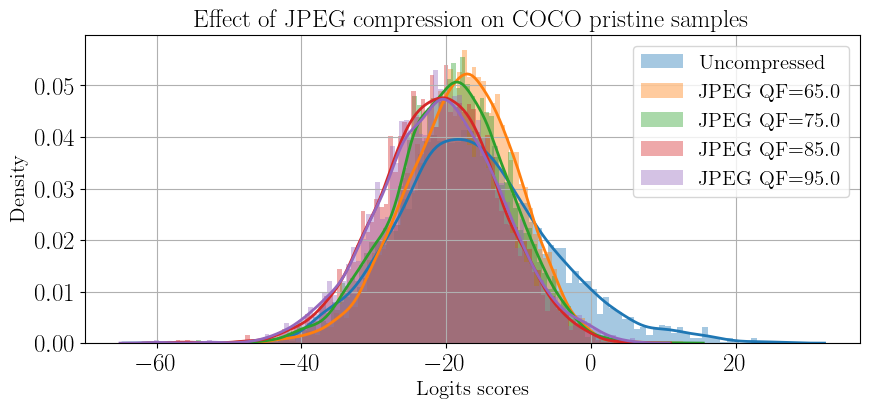

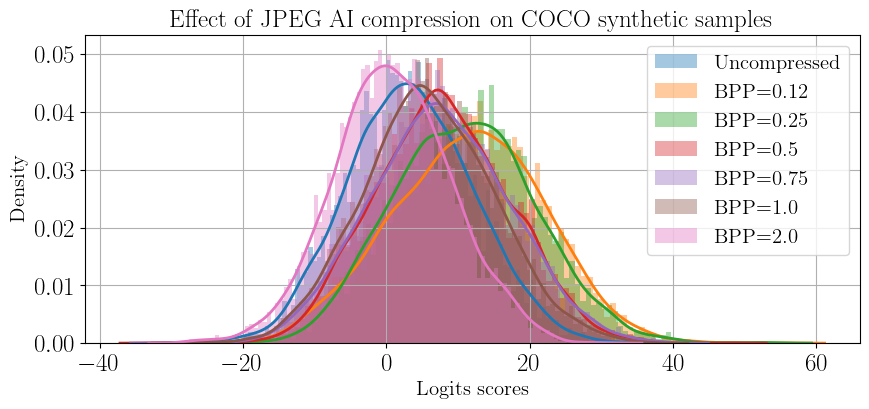

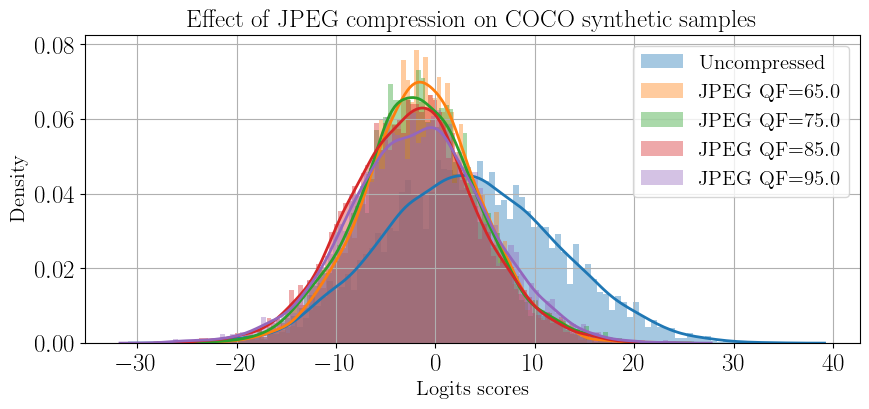

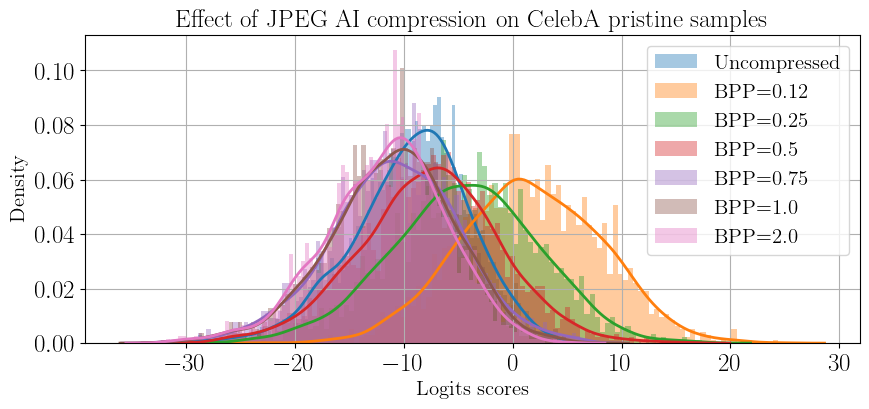

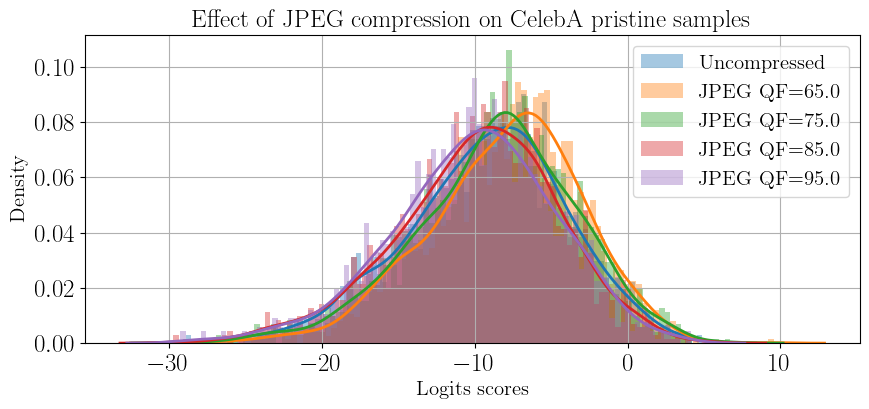

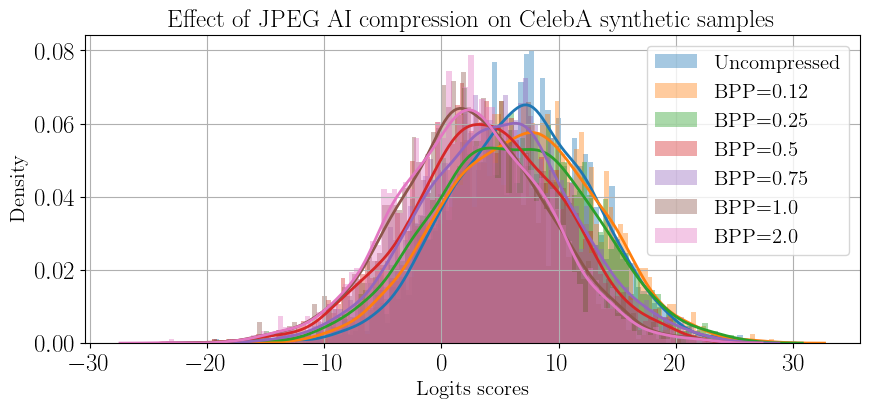

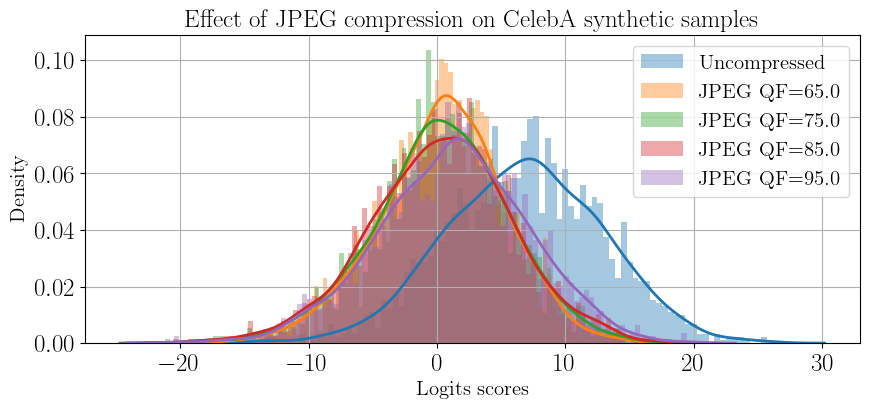

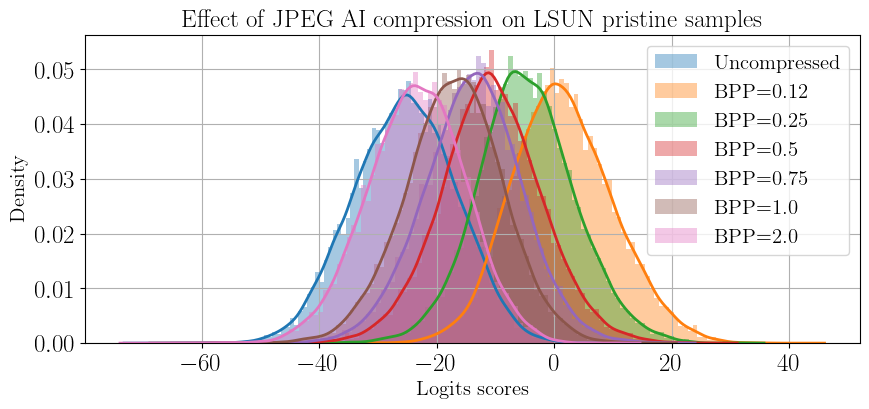

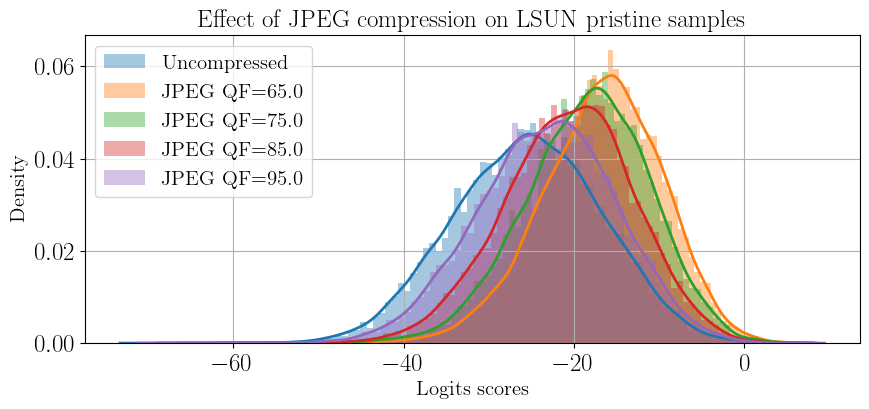

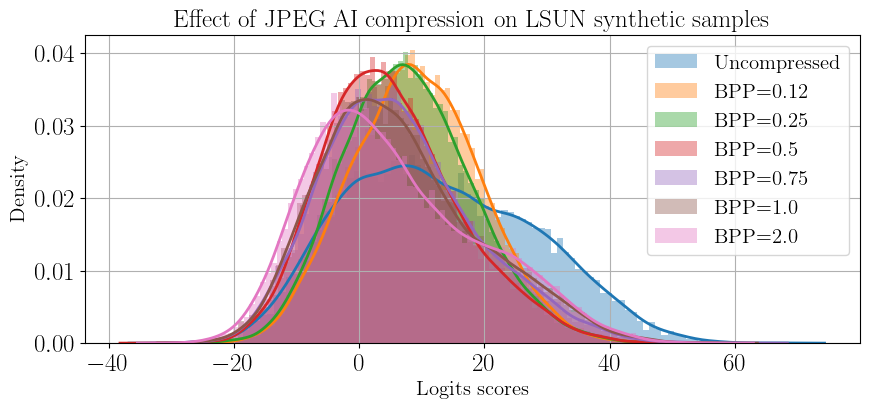

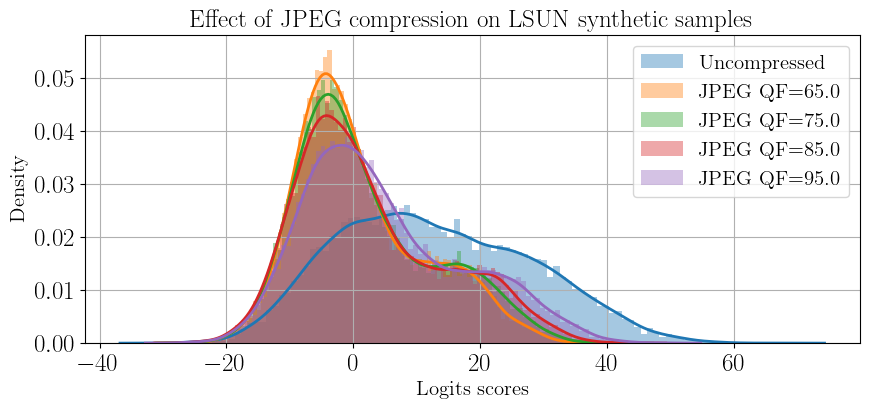

In [5]:
from scipy import stats

colors = mpl.colormaps['Set1'].colors

figsize = (10, 4)
fsize = 15

for dataset_name in results_pristine.index.get_level_values(0).unique():
    
    # --- Get the uncompressed images (both synthetic and pristine)
    not_compressed_real = results_pristine.loc[dataset_name]
    not_compressed_syn = results_synthetic.loc[dataset_name]
    counts, not_compressed_real_bins = np.histogram(not_compressed_real['logits'].tolist(), bins=100)
    counts, not_compressed_syn_bins = np.histogram(not_compressed_syn['logits'].tolist(), bins=100)
    
    # --- Pristine samples --- #
    compressed_jpegai = results_pristine_jpegai.loc[dataset_name]
    compressed_jpeg = results_pristine_jpeg.loc[dataset_name]

    # --- JPEG AI scores plot
    fig, axs = plt.subplots(1, 1, figsize=figsize)
    
    # Uncompressed scores
    seaborn.distplot(not_compressed_real['logits'], bins=not_compressed_real_bins, kde=True, label='Uncompressed',
                     ax=axs)#, color=colors[5])
    
    # Target BPP scores
    for idx, target_bpp in enumerate(sorted(compressed_jpegai['target_bpp'].unique())):
        dataset = compressed_jpegai.loc[compressed_jpegai['target_bpp']==target_bpp]
        counts, score_bins = np.histogram(dataset['logits'], bins=100)
        seaborn.distplot(dataset['logits'], bins=score_bins, kde=True, label=f'BPP={target_bpp}',
                         ax=axs)#, color=colors[idx])
    axs.legend(loc='best', fontsize=fsize)
    axs.set_xlabel('Logits scores', fontsize=fsize)
    axs.set_ylabel('Density', fontsize=fsize)
    axs.set_title(f'Effect of JPEG AI compression on {dataset_labels[dataset_name]} pristine samples')
    axs.grid()
    plt.show()

    # --- JPEG scores plot
    fig, axs = plt.subplots(1, 1, figsize=figsize)
    
    # Uncompressed scores
    seaborn.distplot(not_compressed_real['logits'], bins=not_compressed_real_bins, kde=True, label='Uncompressed',
                     ax=axs)#, color=colors[5])
    
    # Quality factors scores
    for idx, qf in enumerate(sorted(compressed_jpeg['qf'].unique())):
        dataset = compressed_jpeg.loc[compressed_jpeg['qf']==qf]
        counts, score_bins = np.histogram(dataset['logits'], bins=100)
        seaborn.distplot(dataset['logits'], bins=score_bins, kde=True, label=f'JPEG QF={qf}',
                         ax=axs)#, color=colors[idx])
    axs.legend(loc='best', fontsize=fsize)
    axs.set_xlabel('Logits scores', fontsize=fsize)
    axs.set_ylabel('Density', fontsize=fsize)
    axs.set_title(f'Effect of JPEG compression on {dataset_labels[dataset_name]} pristine samples')
    axs.grid()
    plt.show()
    
    # --- Synthetic samples --- #
    compressed_jpegai = results_synthetic_jpegai.loc[dataset_name]
    compressed_jpeg = results_synthetic_jpeg.loc[dataset_name]

    # --- JPEG AI scores plot
    fig, axs = plt.subplots(1, 1, figsize=figsize)
    
    # Uncompressed scores
    seaborn.distplot(not_compressed_syn['logits'], bins=not_compressed_syn_bins, kde=True, label='Uncompressed',
                     ax=axs)#, color=colors[5])
    
    # Target BPP scores
    for idx, target_bpp in enumerate(sorted(compressed_jpegai['target_bpp'].unique())):
        dataset = compressed_jpegai.loc[compressed_jpegai['target_bpp']==target_bpp]
        counts, score_bins = np.histogram(dataset['logits'], bins=100)
        seaborn.distplot(dataset['logits'], bins=score_bins, kde=True, label=f'BPP={target_bpp}',
                         ax=axs)#, color=colors[idx])
    axs.legend(loc='best', fontsize=fsize)
    axs.set_xlabel('Logits scores', fontsize=fsize)
    axs.set_ylabel('Density', fontsize=fsize)
    axs.set_title(f'Effect of JPEG AI compression on {dataset_labels[dataset_name]} synthetic samples')
    axs.grid()
    plt.show()

    # --- JPEG scores plot
    fig, axs = plt.subplots(1, 1, figsize=figsize)
    
    # Uncompressed scores
    seaborn.distplot(not_compressed_syn['logits'], bins=not_compressed_syn_bins, kde=True, label='Uncompressed',
                     ax=axs)#, color=colors[5])
    
    # Quality factors scores
    for idx, qf in enumerate(sorted(compressed_jpeg['qf'].unique())):
        dataset = compressed_jpeg.loc[compressed_jpeg['qf']==qf]
        counts, score_bins = np.histogram(dataset['logits'], bins=100)
        seaborn.distplot(dataset['logits'], bins=score_bins, kde=True, label=f'JPEG QF={qf}',
                         ax=axs)#, color=colors[idx])
    axs.legend(loc='best', fontsize=fsize)
    axs.set_xlabel('Logits scores', fontsize=fsize)
    axs.set_ylabel('Density', fontsize=fsize)
    axs.set_title(f'Effect of JPEG compression on {dataset_labels[dataset_name]} synthetic samples')
    axs.grid()
    plt.show()


### What about some detection metrics?
We need to compare the scores from the different sets of images to get a picture of the effect of JPEG/JPEG AI compression.  
Our case of interests in particular are:
1. pristine images VS pristine images compressed w/ JPEG AI, i.e., can we distinguish pristine VS pristine-JPEG AI images using the detector's deepfake likelihood scores?  
2. pristine images VS pristine images compressed w/ JPEG, i.e., can we distinguish pristine VS pristine-JPEG images using the detector's deepfake likelihood scores?
3. synthetic images VS synthetic images compressed w/ JPEG AI, i.e., can we distinguish synthetic VS synthetic-JPEG AI images using the detector's deepfake likelihood scores?  
4. synthetic images VS synthetic images compressed w/ JPEG, i.e., can we distinguish synthetic VS synthetic-JPEG images using the detector's deepfake likelihood scores?
5. pristine images VS synthetic images, i.e., can we distinguish pristine VS synthetic images using the detector's deepfake likelihood scores?
6. synthetic images VS synthetic images compressed w/ JPEG AI, i.e., can we distinguish between pristine-JPEG AI VS synthetic-JPEG AI images using the detector's deepfake likelihood scores?
7. synthetic images VS synthetic images compressed w/ JPEG, i.e., can we distinguish between pristine-JPEG VS synthetic-JPEG images using the detector's deepfake likelihood scores?

Once again, we divide the results by dataset and by compression ratio applied to the images.

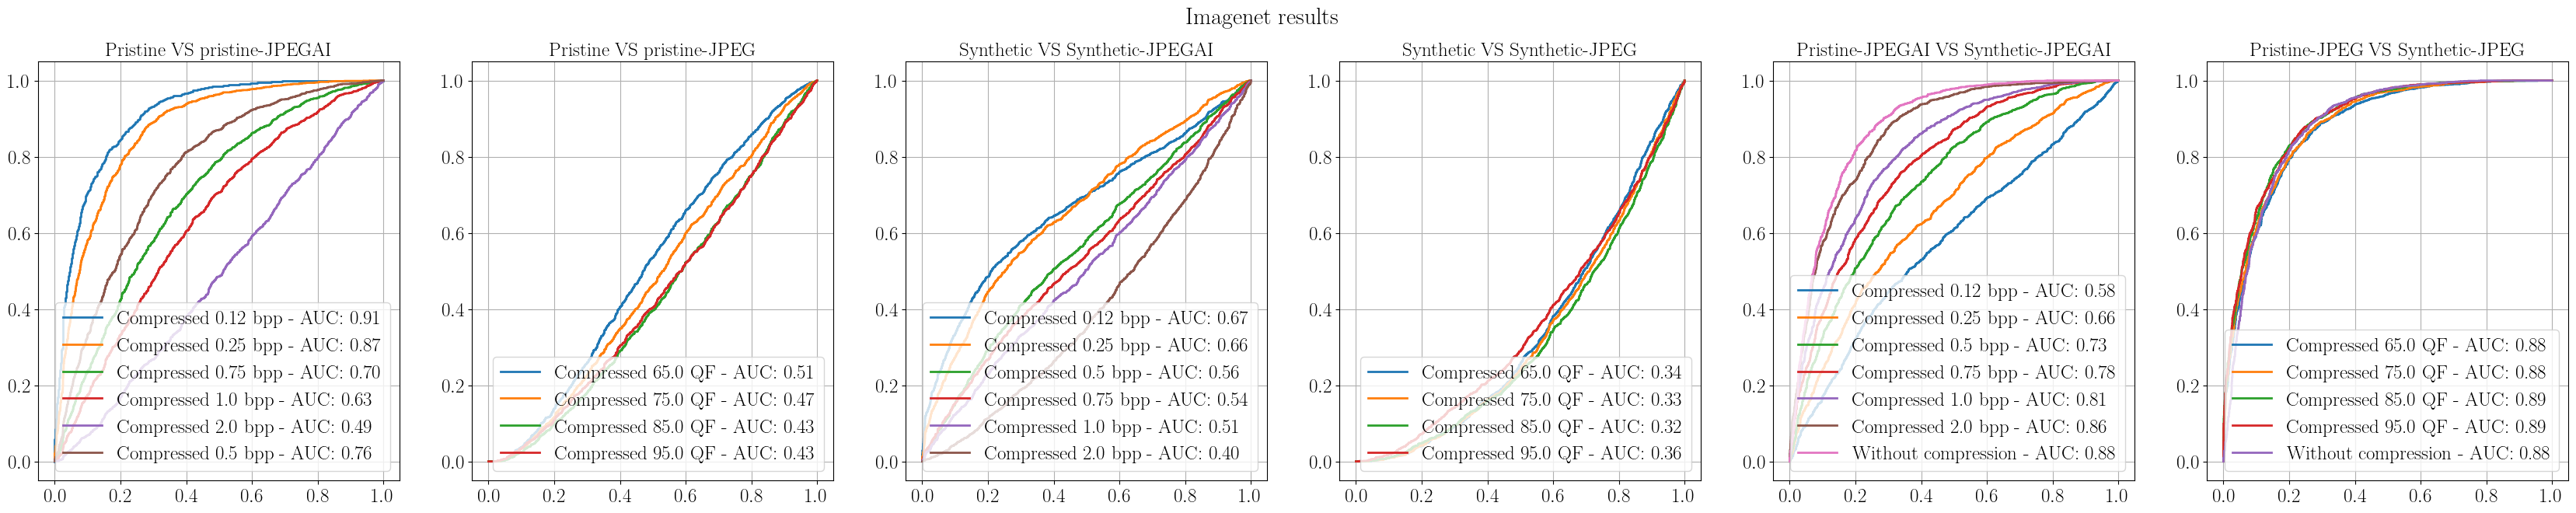

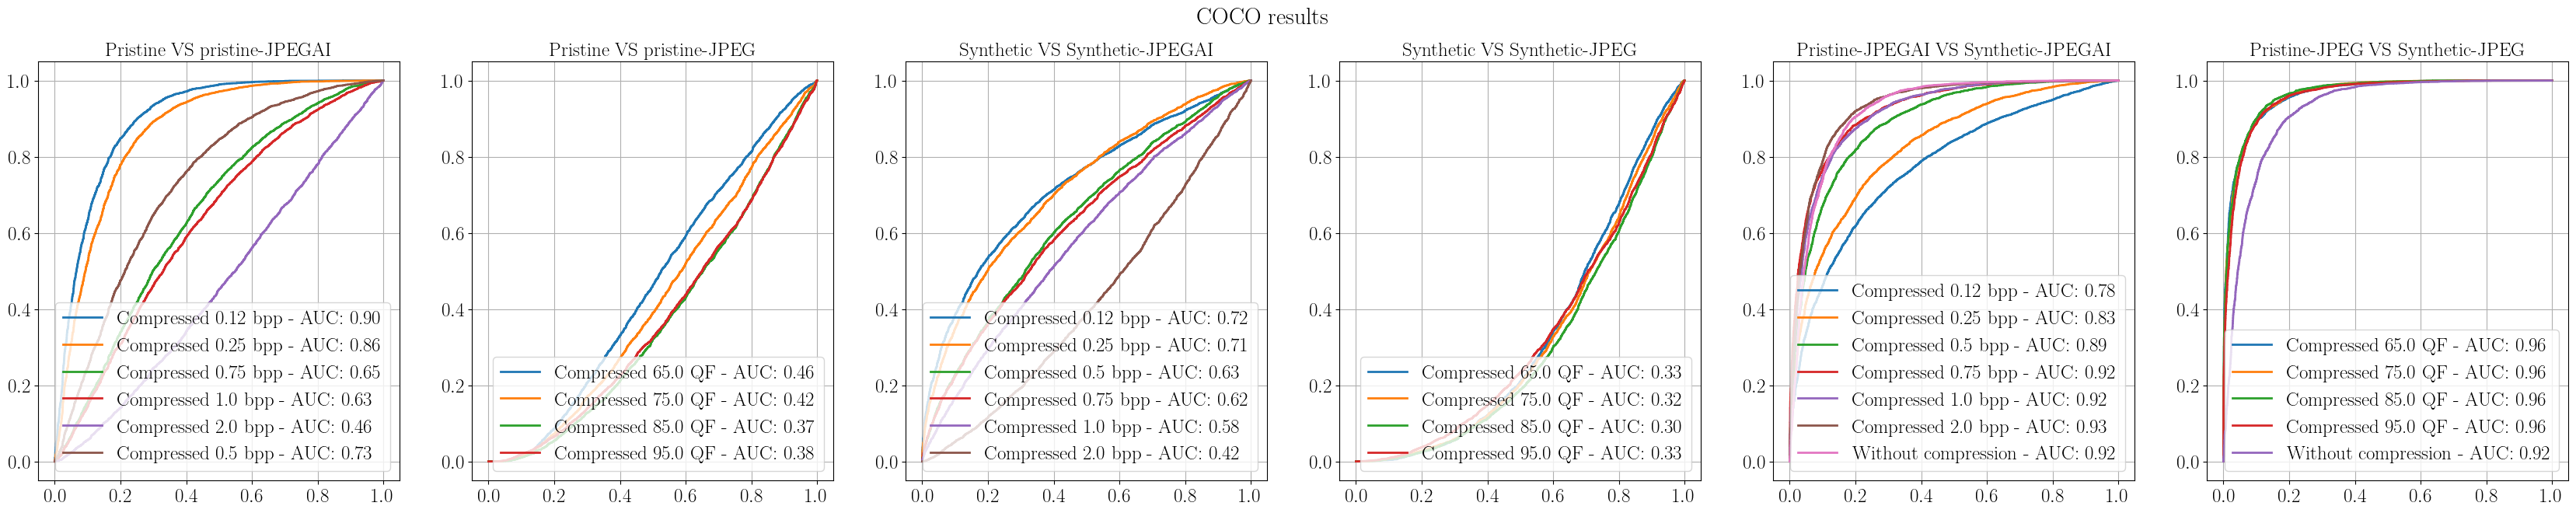

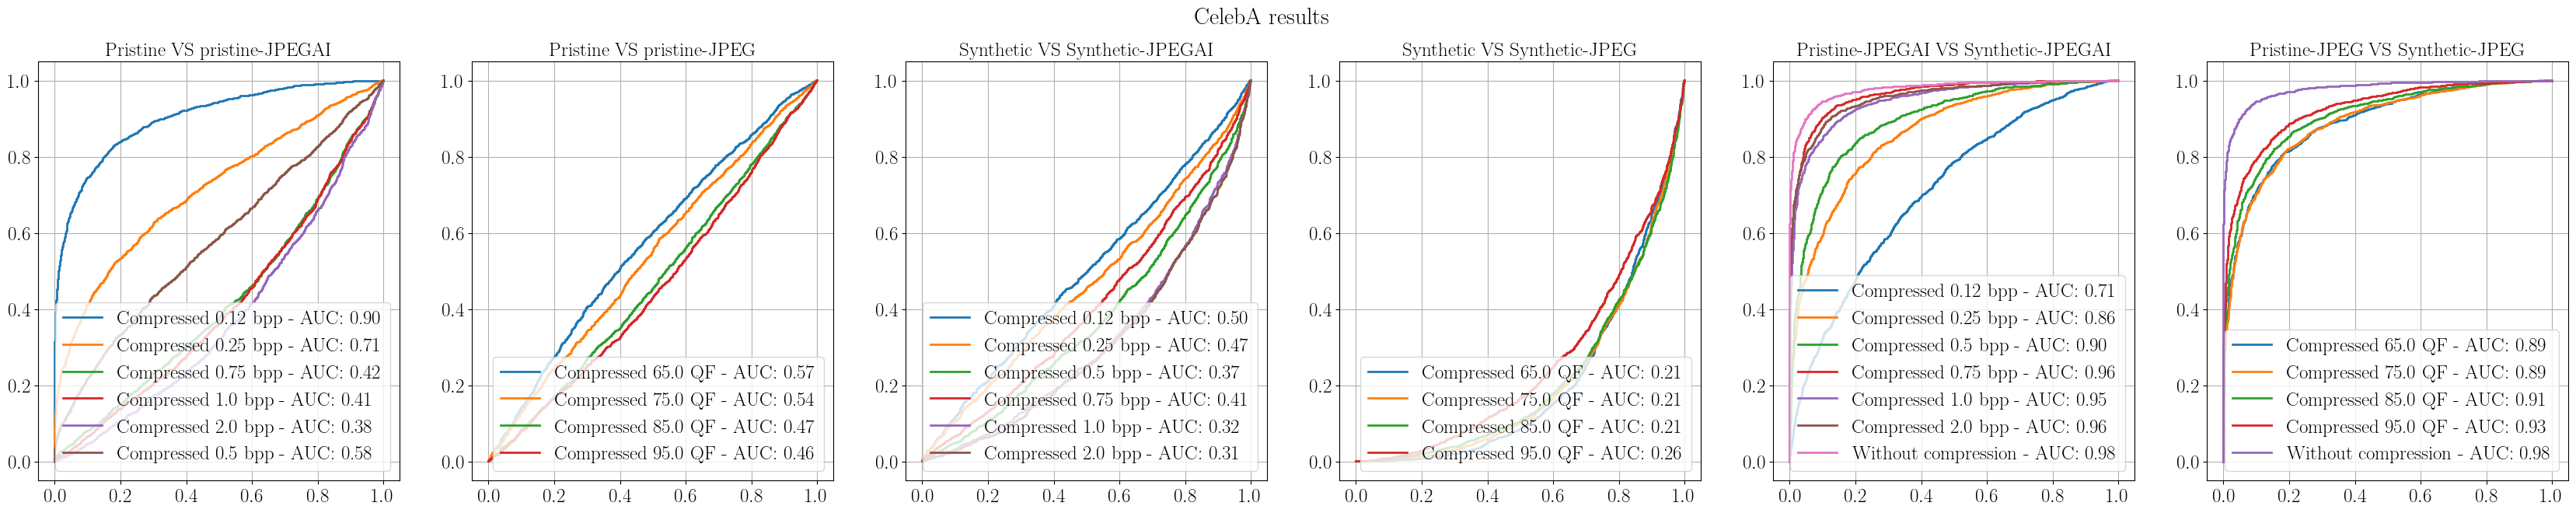

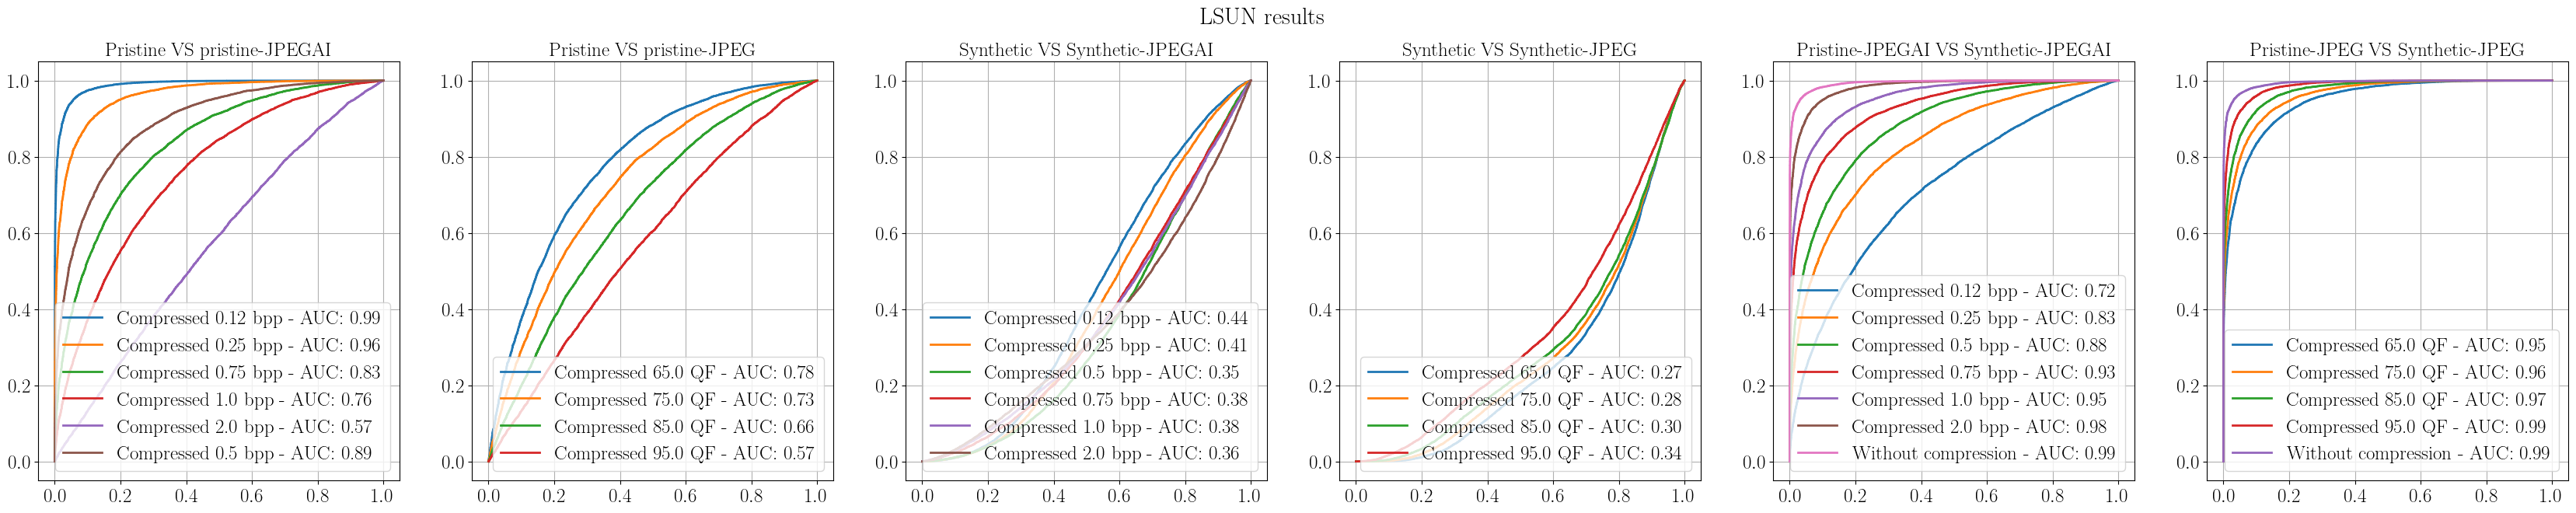

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score


for dataset_name in results_pristine.index.get_level_values(0).unique():
    fig, axs = plt.subplots(1, 6, figsize=(7*6, 7))
    
    # --- Pristine
    
    # Pristine VS Pristine JPEG AI
    for target_bpp in results_pristine_jpegai['target_bpp'].unique():
        dataset = pd.concat([results_pristine_jpegai[results_pristine_jpegai['target_bpp'] == target_bpp].loc[dataset_name], results_pristine.loc[dataset_name]])
        fpr, tpr, _ = roc_curve(dataset['jpeg-ai_compressed'], dataset['logits'])
        # Compute area under the curve
        roc_auc = roc_auc_score(dataset['jpeg-ai_compressed'], dataset['logits'])
        axs[0].plot(fpr, tpr, label=f'Compressed {target_bpp} bpp - AUC: %.2f' % roc_auc)
    axs[0].legend(loc='lower right')
    axs[0].set_title(f'Pristine VS pristine-JPEGAI')
    axs[0].grid()
        
    # Pristine VS Pristine JPEG AI
    for qf in results_pristine_jpeg['qf'].unique():
        dataset = pd.concat([results_pristine_jpeg[results_pristine_jpeg['qf'] == qf].loc[dataset_name], results_pristine.loc[dataset_name]])
        fpr, tpr, _ = roc_curve(dataset['jpeg_compressed'], dataset['logits'])
        # Compute area under the curve
        roc_auc = roc_auc_score(dataset['jpeg_compressed'], dataset['logits'])
        axs[1].plot(fpr, tpr, label=f'Compressed {qf} QF - AUC: %.2f' % roc_auc)
    axs[1].legend(loc='lower right')
    axs[1].set_title(f'Pristine VS pristine-JPEG')
    axs[1].grid()
    
    # --- Synthetic
        
    # Synthetic VS Synthetic JPEG AI
    for target_bpp in results_synthetic_jpegai['target_bpp'].unique():
        dataset = pd.concat([results_synthetic_jpegai[results_synthetic_jpegai['target_bpp'] == target_bpp].loc[dataset_name], results_synthetic.loc[dataset_name]])
        fpr, tpr, _ = roc_curve(dataset['jpeg-ai_compressed'], dataset['logits'])
        # Compute area under the curve
        roc_auc = roc_auc_score(dataset['jpeg-ai_compressed'], dataset['logits'])
        axs[2].plot(fpr, tpr, label=f'Compressed {target_bpp} bpp - AUC: %.2f' % roc_auc)
    axs[2].legend(loc='lower right')
    axs[2].set_title(f'Synthetic VS Synthetic-JPEGAI')
    axs[2].grid()
    
    # Synthetic VS Synthetic JPEG
    for qf in results_synthetic_jpeg['qf'].unique():
        dataset = pd.concat([results_synthetic_jpeg[results_synthetic_jpeg['qf'] == qf].loc[dataset_name], results_synthetic.loc[dataset_name]])
        fpr, tpr, _ = roc_curve(dataset['jpeg_compressed'], dataset['logits'])
        # Compute area under the curve
        roc_auc = roc_auc_score(dataset['jpeg_compressed'], dataset['logits'])
        axs[3].plot(fpr, tpr, label=f'Compressed {qf} QF - AUC: %.2f' % roc_auc)
    axs[3].legend(loc='lower right')
    axs[3].set_title(f'Synthetic VS Synthetic-JPEG')
    axs[3].grid()
    
    # --- Pristine VS Synthetic
    
    # --- Pristine JPEG AI VS Synthetic JPEG AI
    for target_bpp in results_synthetic_jpegai['target_bpp'].unique():
        dataset = pd.concat([results_synthetic_jpegai[results_synthetic_jpegai['target_bpp'] == target_bpp].loc[dataset_name], results_pristine_jpegai[results_pristine_jpegai['target_bpp'] == target_bpp].loc[dataset_name]])
        fpr, tpr, _ = roc_curve(dataset['label'], dataset['logits'])
        # Compute area under the curve
        roc_auc = roc_auc_score(dataset['label'], dataset['logits'])
        axs[4].plot(fpr, tpr, label=f'Compressed {target_bpp} bpp - AUC: %.2f' % roc_auc)
    axs[4].set_title(f'Pristine-JPEGAI VS Synthetic-JPEGAI')
    axs[4].grid()
    
    # --- Pristine JPEG VS Synthetic JPEG
    for qf in results_synthetic_jpeg['qf'].unique():
        dataset = pd.concat([results_synthetic_jpeg[results_synthetic_jpeg['qf'] == qf].loc[dataset_name], results_pristine_jpeg[results_pristine_jpeg['qf'] == qf].loc[dataset_name]])
        fpr, tpr, _ = roc_curve(dataset['label'], dataset['logits'])
        # Compute area under the curve
        roc_auc = roc_auc_score(dataset['label'], dataset['logits'])
        axs[5].plot(fpr, tpr, label=f'Compressed {qf} QF - AUC: %.2f' % roc_auc)
    axs[5].set_title(f'Pristine-JPEG VS Synthetic-JPEG')
    axs[5].grid()
    
    # COMPARISON WITHOUT COMPRESSION
    samples = pd.concat([results_pristine.loc[dataset_name], results_synthetic.loc[dataset_name]])
    fpr, tpr, _ = roc_curve(samples['label'], samples['logits'])
    # Compute area under the curve
    roc_auc = roc_auc_score(samples['label'], samples['logits'])
    axs[4].plot(fpr, tpr, label='Without compression - AUC: %.2f' % roc_auc)
    axs[4].legend(loc='lower right')
    axs[5].plot(fpr, tpr, label='Without compression - AUC: %.2f' % roc_auc)
    axs[5].legend(loc='lower right')
    fig.suptitle(f'{dataset_labels[dataset_name]} results')
    plt.show()


### Looks like JPEG AI compression affects a lot pristine images!
JPEG AI pristine images become easily detectable as deepfakes, while it does not affect a lot the response of the detector when applied to synthetic images.  
This phenomenon impairs specifically the detectability of synthetic samples when we apply JPEG AI compression to both pristine and synthetic images, as shown in the second plot from the left.  
This is probably due to an increased amount of **false positives**, i.e., pristine images classified as deepfakes, when we compress both classes of samples with JPEG AI.  
### JPEG compression instead seems to affect synthetic samples!
This is well-known in the forensic community. Data compression tends to cancel traces that might helpful in discriminating synthetic content, like frequency traces due to upsampling operators, so that synthetic images might be classified as pristine.  
We can quantify this behavior measuring to an increased amount of **false negatives**, i.e., deepfake images classified as pristine, when we compress both classes of samples with JPEG.  
Can we quantify this behavior numerically?

## Let's compute some quantitative metrics
Run the `compute_metrics.py` script for getting this numbers.

In [10]:
results_df = pd.read_csv(os.path.join(results_dir, 'metrics.csv'), index_col=[0, 1, 2, 3]).loc['Wang2020-A']
results_df

WD       auc  fpr_thr0  \
Dataset    Quality Test                                                     
All_images All     Real_vs_Real-JPEGAI      11.188751  0.765159  0.024509   
                   Real_vs_Real-JPEG         3.085629  0.580915  0.024509   
                   Synth_vs_Synth-JPEGAI     3.110376  0.434285  0.770438   
                   Synth_vs_Synth-JPEG      11.303482  0.251607  0.770438   
                   Real_vs_Synth            32.696954  0.972530  0.024509   
...                                               ...       ...       ...   
lsun       85.0    Synth_vs_Synth-JPEG      10.156259  0.299340  0.775738   
                   Real-JPEG_vs_Synth-JPEG  23.329514  0.973059  0.001474   
           95.0    Real_vs_Real-JPEG         2.192014  0.573760  0.000590   
                   Synth_vs_Synth-JPEG       8.022561  0.342294  0.775738   
                   Real-JPEG_vs_Synth-JPEG  28.011470  0.985285  0.000737   

                                            tpr_thr0   ba_thr0  fnr_thr0  \
Dataset    Quality Test                                                    
All_images All     Real_vs_Real-JPEGAI      0.187822  0.581657  0.812178   
                   Real_vs_Real-JPEG        0.006216  0.490853  0.993784   
                   Synth_vs_Synth-JPEGAI    0.748603  0.489082  0.251397   
                   Synth_vs_Synth-JPEG      0.448471  0.339017  0.551529   
                   Real_vs_Synth            0.770438  0.872965  0.229562   
...                                              ...       ...       ...   
lsun       85.0    Synth_vs_Synth-JPEG      0.498971  0.361616  0.501029   
                   Real-JPEG_vs_Synth-JPEG  0.498971  0.748748  0.501029   
           95.0    Real_vs_Real-JPEG        0.000737  0.500074  0.999263   
                   Synth_vs_Synth-JPEG      0.578453  0.401357  0.421547   
                   Real-JPEG_vs_Synth-JPEG  0.578453  0.788858  0.421547   

                                            tnr_thr0  
Dataset    Quality Test                               
All_images All     Real_vs_Real-JPEGAI      0.975491  
                   Real_vs_Real-JPEG        0.975491  
                   Synth_vs_Synth-JPEGAI    0.229562  
                   Synth_vs_Synth-JPEG      0.229562  
                   Real_vs_Synth            0.975491  
...                                              ...  
lsun       85.0    Synth_vs_Synth-JPEG      0.224262  
                   Real-JPEG_vs_Synth-JPEG  0.998526  
           95.0    Real_vs_Real-JPEG        0.999410  
                   Synth_vs_Synth-JPEG      0.224262  
                   Real-JPEG_vs_Synth-JPEG  0.999263  

[185 rows x 7 columns]

### Let's try to summarize some results

#### Pristine VS Pristine JPEG AI

In [11]:
# Create average performances first
avg_results = results_df.copy()    
average_df = avg_results.drop('All_images').swaplevel(0, 2).swaplevel(0, 2).groupby(['Test', 'Quality']).mean()
average_df = pd.concat({'average': average_df}, names=['Dataset', 'Test', 'Quality'])
average_df = pd.concat([avg_results.swaplevel(1, 2), average_df])

# Re-organize the Dataframe for a clean print
det_results = []
if 'raw_camera' in average_df.index.get_level_values(0).unique():
    average_df = average_df.drop('raw_camera')
for dataset in average_df.drop('All_images').index.get_level_values(0).unique():
    dis_df = average_df.loc[dataset]
    # Synth DF
    synth_df = dis_df.loc['Real_vs_Synth'].rename({'All': 'Synthetic'}, axis=0)
    # JPEG AI DF
    jpegai_df = dis_df.loc['Real_vs_Real-JPEGAI'].drop('All')
    # Concat everything
    print_df = pd.concat([synth_df, jpegai_df])
    print_df.index.names = ['Test']
    print_df.rename({'0.12': 'BPP = 0.12', '0.25': 'BPP = 0.25', '0.5': 'BPP = 0.5',
                     '0.75': 'BPP = 0.75', '1.0': 'BPP = 1.0',
                     '2.0': 'BPP = 2.0'}, axis=0, inplace=True)
    print_df = print_df.reindex(['Synthetic', 'BPP = 0.12', 'BPP = 0.25', 'BPP = 0.5', 'BPP = 0.75', 'BPP = 1.0', 'BPP = 2.0'], axis=0)
    print_df['Results string'] = ''
    for i, r in print_df.iterrows():
        print_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["ba_thr0"]:.2f} & {r["tpr_thr0"]:.2f}'
        #results_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["tpr_thr0"]:.2f}'
        #det_df.loc[i, 'Results string'] = f'{r["WD"]:.3f} / {r["auc"]:.3f}'
    print_df = print_df[['Results string']]
    print_df.rename({'Results string': dataset_labels[dataset]}, axis=1, inplace=True)
    det_results.append(print_df.transpose())

det_results = pd.concat(det_results)

#print(det_results.to_latex(column_format='c|c|ccccc', caption=f'{detectors_labels["Corvi2023"]} results per dataset.'))  
display(det_results)
    

Test,Synthetic,BPP = 0.12,BPP = 0.25,BPP = 0.5,BPP = 0.75,BPP = 1.0,BPP = 2.0
Imagenet,15.35 & 0.88 & 0.70 & 0.47,18.62 & 0.91 & 0.76 & 0.59,15.21 & 0.87 & 0.70 & 0.46,9.50 & 0.76 & 0.59 & 0.24,6.90 & 0.70 & 0.55 & 0.17,4.55 & 0.63 & 0.52 & 0.11,0.80 & 0.49 & 0.49 & 0.04
COCO,19.69 & 0.92 & 0.79 & 0.65,17.29 & 0.90 & 0.72 & 0.52,14.78 & 0.86 & 0.67 & 0.41,8.15 & 0.73 & 0.55 & 0.17,5.02 & 0.65 & 0.52 & 0.10,4.22 & 0.63 & 0.51 & 0.10,1.55 & 0.46 & 0.48 & 0.04
CelebA,16.07 & 0.98 & 0.92 & 0.87,10.88 & 0.90 & 0.78 & 0.59,4.82 & 0.71 & 0.61 & 0.25,1.67 & 0.58 & 0.54 & 0.11,1.62 & 0.42 & 0.50 & 0.03,1.77 & 0.41 & 0.49 & 0.02,2.34 & 0.38 & 0.49 & 0.01
LSUN,38.22 & 0.99 & 0.89 & 0.78,26.91 & 0.99 & 0.78 & 0.55,20.71 & 0.96 & 0.64 & 0.27,14.73 & 0.89 & 0.55 & 0.10,11.58 & 0.83 & 0.52 & 0.05,8.40 & 0.76 & 0.51 & 0.02,1.99 & 0.57 & 0.50 & 0.00
Average,22.33 & 0.94 & 0.82 & 0.69,18.42 & 0.92 & 0.76 & 0.56,13.88 & 0.85 & 0.65 & 0.35,8.51 & 0.74 & 0.56 & 0.16,6.28 & 0.65 & 0.52 & 0.09,4.74 & 0.61 & 0.51 & 0.06,1.67 & 0.47 & 0.49 & 0.02


#### Pristine vs Pristine-JPEG

In [12]:
# Create average performances first
avg_results = results_df.copy()    
average_df = avg_results.drop('All_images').swaplevel(0, 2).swaplevel(0, 2).groupby(['Test', 'Quality']).mean()
average_df = pd.concat({'average': average_df}, names=['Dataset', 'Test', 'Quality'])
average_df = pd.concat([avg_results.swaplevel(1, 2), average_df])

# Re-organize the Dataframe for a clean print
det_results = []
if 'raw_camera' in average_df.index.get_level_values(0).unique():
    average_df = average_df.drop('raw_camera')
for dataset in average_df.drop('All_images').index.get_level_values(0).unique():
    dis_df = average_df.loc[dataset]
    # Synth DF
    synth_df = dis_df.loc['Real_vs_Synth'].rename({'All': 'Synthetic'}, axis=0)
    # JPEG AI DF
    jpegai_df = dis_df.loc['Real_vs_Real-JPEG'].drop('All')
    # Concat everything
    print_df = pd.concat([synth_df, jpegai_df])
    print_df.index.names = ['Test']
    print_df.rename({'65.0': 'QF = 65', '75.0': 'QF = 75', '85.0': 'QF = 85',
                     '95.0': 'QF = 95'}, axis=0, inplace=True)
    print_df = print_df.reindex(['Synthetic', 'QF = 65', 'QF = 75', 'QF = 85', 'QF = 95'], axis=0)
    print_df['Results string'] = ''
    for i, r in print_df.iterrows():
        print_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["ba_thr0"]:.2f} & {r["tpr_thr0"]:.2f}'
        #results_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["tpr_thr0"]:.2f}'
        #det_df.loc[i, 'Results string'] = f'{r["WD"]:.3f} / {r["auc"]:.3f}'
    print_df = print_df[['Results string']]
    print_df.rename({'Results string': dataset_labels[dataset]}, axis=1, inplace=True)
    det_results.append(print_df.transpose())

det_results = pd.concat(det_results)

#print(det_results.to_latex(column_format='c|c|ccccc', caption=f'{detectors_labels["Corvi2023"]} results per dataset.'))  
display(det_results)
    

Test,Synthetic,QF = 65,QF = 75,QF = 85,QF = 95
Imagenet,15.35 & 0.88 & 0.70 & 0.47,2.09 & 0.51 & 0.47 & 0.01,1.81 & 0.47 & 0.47 & 0.01,2.74 & 0.43 & 0.47 & 0.01,2.56 & 0.43 & 0.47 & 0.01
COCO,19.69 & 0.92 & 0.79 & 0.65,2.34 & 0.46 & 0.47 & 0.00,3.08 & 0.42 & 0.47 & 0.00,4.69 & 0.37 & 0.47 & 0.00,4.51 & 0.38 & 0.47 & 0.01
CelebA,16.07 & 0.98 & 0.92 & 0.87,1.26 & 0.57 & 0.51 & 0.04,0.68 & 0.54 & 0.50 & 0.04,0.53 & 0.47 & 0.50 & 0.02,0.78 & 0.46 & 0.49 & 0.02
LSUN,38.22 & 0.99 & 0.89 & 0.78,8.67 & 0.78 & 0.50 & 0.00,6.95 & 0.73 & 0.50 & 0.00,4.74 & 0.66 & 0.50 & 0.00,2.19 & 0.57 & 0.50 & 0.00
Average,22.33 & 0.94 & 0.82 & 0.69,3.59 & 0.58 & 0.49 & 0.02,3.13 & 0.54 & 0.49 & 0.01,3.18 & 0.48 & 0.48 & 0.01,2.51 & 0.46 & 0.48 & 0.01


#### Synthetic VS Synthetic-JPEGAI

In [13]:
# Create average performances first
avg_results = results_df.copy()    
average_df = avg_results.drop('All_images').swaplevel(0, 2).swaplevel(0, 2).groupby(['Test', 'Quality']).mean()
average_df = pd.concat({'average': average_df}, names=['Dataset', 'Test', 'Quality'])
average_df = pd.concat([avg_results.swaplevel(1, 2), average_df])

# Re-organize the Dataframe for a clean print
det_results = []
if 'raw_camera' in average_df.index.get_level_values(0).unique():
    average_df = average_df.drop('raw_camera')
for dataset in average_df.drop('All_images').index.get_level_values(0).unique():
    dis_df = average_df.loc[dataset]
    # Synth DF
    synth_df = dis_df.loc['Real_vs_Synth'].rename({'All': 'No compression'}, axis=0)
    # JPEG AI DF
    jpegai_df = dis_df.loc['Synth_vs_Synth-JPEGAI'].drop('All')
    # Concat everything
    print_df = pd.concat([synth_df, jpegai_df])
    print_df.index.names = ['Test']
    print_df.rename({'0.12': 'BPP = 0.12', '0.25': 'BPP = 0.25', '0.5': 'BPP = 0.5',
                     '0.75': 'BPP = 0.75', '1.0': 'BPP = 1.0',
                     '2.0': 'BPP = 2.0'}, axis=0, inplace=True)
    print_df = print_df.reindex(['No compression', 'BPP = 0.12', 'BPP = 0.25', 'BPP = 0.5', 'BPP = 0.75', 'BPP = 1.0', 'BPP = 2.0'], axis=0)
    print_df['Results string'] = ''
    for i, r in print_df.iterrows():
        print_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["ba_thr0"]:.2f} & {r["tpr_thr0"]:.2f}'
        #results_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["tpr_thr0"]:.2f}'
        #det_df.loc[i, 'Results string'] = f'{r["WD"]:.3f} / {r["auc"]:.3f}'
    print_df = print_df[['Results string']]
    print_df.rename({'Results string': dataset_labels[dataset]}, axis=1, inplace=True)
    det_results.append(print_df.transpose())

det_results = pd.concat(det_results)

#print(det_results.to_latex(column_format='c|c|ccccc', caption=f'{detectors_labels["Corvi2023"]} results per dataset.'))  
display(det_results)
    

Test,No compression,BPP = 0.12,BPP = 0.25,BPP = 0.5,BPP = 0.75,BPP = 1.0,BPP = 2.0
Imagenet,15.35 & 0.88 & 0.70 & 0.47,6.02 & 0.67 & 0.61 & 0.68,5.26 & 0.66 & 0.60 & 0.67,1.85 & 0.56 & 0.54 & 0.55,1.30 & 0.54 & 0.52 & 0.52,0.51 & 0.51 & 0.50 & 0.46,2.87 & 0.40 & 0.42 & 0.32
COCO,19.69 & 0.92 & 0.79 & 0.65,8.01 & 0.72 & 0.60 & 0.85,7.51 & 0.71 & 0.61 & 0.86,4.42 & 0.63 & 0.57 & 0.80,4.07 & 0.62 & 0.56 & 0.77,2.53 & 0.58 & 0.55 & 0.74,2.46 & 0.42 & 0.45 & 0.54
CelebA,16.07 & 0.98 & 0.92 & 0.87,0.43 & 0.50 & 0.49 & 0.84,0.94 & 0.47 & 0.47 & 0.81,2.92 & 0.37 & 0.43 & 0.73,2.00 & 0.41 & 0.45 & 0.76,4.11 & 0.32 & 0.40 & 0.67,4.29 & 0.31 & 0.40 & 0.66
LSUN,38.22 & 0.99 & 0.89 & 0.78,4.68 & 0.44 & 0.51 & 0.81,5.42 & 0.41 & 0.50 & 0.77,7.54 & 0.35 & 0.44 & 0.66,6.42 & 0.38 & 0.45 & 0.67,6.31 & 0.38 & 0.44 & 0.66,7.11 & 0.36 & 0.41 & 0.60
Average,22.33 & 0.94 & 0.82 & 0.69,4.78 & 0.58 & 0.55 & 0.80,4.78 & 0.56 & 0.54 & 0.78,4.18 & 0.48 & 0.50 & 0.68,3.45 & 0.49 & 0.50 & 0.68,3.37 & 0.45 & 0.47 & 0.63,4.18 & 0.37 & 0.42 & 0.53


#### Synthetic VS Synthetic-JPEG

In [14]:
# Create average performances first
avg_results = results_df.copy()    
average_df = avg_results.drop('All_images').swaplevel(0, 2).swaplevel(0, 2).groupby(['Test', 'Quality']).mean()
average_df = pd.concat({'average': average_df}, names=['Dataset', 'Test', 'Quality'])
average_df = pd.concat([avg_results.swaplevel(1, 2), average_df])

# Re-organize the Dataframe for a clean print
det_results = []
if 'raw_camera' in average_df.index.get_level_values(0).unique():
    average_df = average_df.drop('raw_camera')
for dataset in average_df.drop('All_images').index.get_level_values(0).unique():
    dis_df = average_df.loc[dataset]
    # Synth DF
    synth_df = dis_df.loc['Real_vs_Synth'].rename({'All': 'No compression'}, axis=0)
    # JPEG AI DF
    jpegai_df = dis_df.loc['Synth_vs_Synth-JPEG'].drop('All')
    # Concat everything
    print_df = pd.concat([synth_df, jpegai_df])
    print_df.index.names = ['Test']
    print_df.rename({'65.0': 'QF = 65', '75.0': 'QF = 75', '85.0': 'QF = 85',
                     '95.0': 'QF = 95'}, axis=0, inplace=True)
    print_df = print_df.reindex(['No compression', 'QF = 65', 'QF = 75', 'QF = 85', 'QF = 95'], axis=0)
    print_df['Results string'] = ''
    for i, r in print_df.iterrows():
        print_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["ba_thr0"]:.2f} & {r["tpr_thr0"]:.2f}'
        #results_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["tpr_thr0"]:.2f}'
        #det_df.loc[i, 'Results string'] = f'{r["WD"]:.3f} / {r["auc"]:.3f}'
    print_df = print_df[['Results string']]
    print_df.rename({'Results string': dataset_labels[dataset]}, axis=1, inplace=True)
    det_results.append(print_df.transpose())

det_results = pd.concat(det_results)

#print(det_results.to_latex(column_format='c|c|ccccc', caption=f'{detectors_labels["Corvi2023"]} results per dataset.'))  
display(det_results)
    

Test,No compression,QF = 65,QF = 75,QF = 85,QF = 95
Imagenet,15.35 & 0.88 & 0.70 & 0.47,4.22 & 0.34 & 0.37 & 0.21,4.57 & 0.33 & 0.37 & 0.21,4.92 & 0.32 & 0.37 & 0.20,3.95 & 0.36 & 0.39 & 0.26
COCO,19.69 & 0.92 & 0.79 & 0.65,4.78 & 0.33 & 0.38 & 0.41,5.10 & 0.32 & 0.37 & 0.39,5.67 & 0.30 & 0.36 & 0.36,5.08 & 0.33 & 0.38 & 0.40
CelebA,16.07 & 0.98 & 0.92 & 0.87,6.38 & 0.21 & 0.35 & 0.56,6.47 & 0.21 & 0.33 & 0.53,6.49 & 0.21 & 0.33 & 0.53,5.49 & 0.26 & 0.37 & 0.60
LSUN,38.22 & 0.99 & 0.89 & 0.78,11.68 & 0.27 & 0.33 & 0.44,10.88 & 0.28 & 0.35 & 0.47,10.16 & 0.30 & 0.36 & 0.50,8.02 & 0.34 & 0.40 & 0.58
Average,22.33 & 0.94 & 0.82 & 0.69,6.76 & 0.29 & 0.36 & 0.41,6.76 & 0.29 & 0.36 & 0.40,6.81 & 0.28 & 0.35 & 0.40,5.64 & 0.32 & 0.39 & 0.46


#### Pristine-JPEGAI VS Synth-JPEGAI

In [15]:
# Labels for plotting
detectors_labels = {'Wang2020JPEG01': '\\cite{wang2020}-A',	
                    'Wang2020JPEG05': '\\cite{wang2020}-B',	
                    'Grag2021_progan': '\\cite{gragnaniello2021}',
                    'Corvi2023': '\\cite{Corvi_2023_ICASSP}',
                    'Ohja2023': '\\cite{Ojha_2023_CVPR}',
                    'CLIP2024': '\\cite{cozzolino2023raising}-A',	
                    'CLIP2024Plus': '\\cite{cozzolino2023raising}-B'}
dataset_labels = {'imagenet': 'Imagenet', 'lsun': 'LSUN', 'coco': 'COCO', 
                  'ffhq': 'FFHQ', 'laion': 'LAION', 'raise': 'RAISE', 'celeba': 'CelebA', 'average': 'Average'}

# Create average performances first
avg_results = results_df.copy()    
average_df = avg_results.drop('All_images').swaplevel(0, 2).swaplevel(0, 2).groupby(['Test', 'Quality']).mean()
average_df = pd.concat({'average': average_df}, names=['Dataset', 'Test', 'Quality'])
average_df = pd.concat([avg_results.swaplevel(1, 2), average_df])

# Re-organize the Dataframe for a clean print
det_results = []
if 'raw_camera' in average_df.index.get_level_values(0).unique():
    average_df = average_df.drop('raw_camera')
for dataset in average_df.drop('All_images').index.get_level_values(0).unique():
    dis_df = average_df.loc[dataset]
    # Synth DF
    synth_df = dis_df.loc['Real_vs_Synth'].rename({'All': 'No compression'}, axis=0)
    # JPEG AI DF
    jpegai_df = dis_df.loc['Real-JPEGAI_vs_Synth-JPEGAI'].drop('All')
    # Concat everything
    print_df = pd.concat([synth_df, jpegai_df])
    print_df.index.names = ['Test']
    print_df.rename({'0.12': 'BPP = 0.12', '0.25': 'BPP = 0.25', '0.5': 'BPP = 0.5',
                     '0.75': 'BPP = 0.75', '1.0': 'BPP = 1.0',
                     '2.0': 'BPP = 2.0'}, axis=0, inplace=True)
    print_df = print_df.reindex(['No compression', 'BPP = 0.12', 'BPP = 0.25', 'BPP = 0.5', 'BPP = 0.75', 'BPP = 1.0', 'BPP = 2.0'], axis=0)
    print_df['Results string'] = ''
    for i, r in print_df.iterrows():
        print_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["ba_thr0"]:.2f} & {r["fpr_thr0"]:.2f}'
        #results_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["tpr_thr0"]:.2f}'
        #det_df.loc[i, 'Results string'] = f'{r["WD"]:.3f} / {r["auc"]:.3f}'
    print_df = print_df[['Results string']]
    print_df.rename({'Results string': dataset_labels[dataset]}, axis=1, inplace=True)
    det_results.append(print_df.transpose())

det_results = pd.concat(det_results)

#print(det_results.to_latex(column_format='c|c|ccccc', caption=f'{detectors_labels["Corvi2023"]} results per dataset.'))  
display(det_results)
    

Test,No compression,BPP = 0.12,BPP = 0.25,BPP = 0.5,BPP = 0.75,BPP = 1.0,BPP = 2.0
Imagenet,15.35 & 0.88 & 0.70 & 0.07,2.76 & 0.58 & 0.55 & 0.59,5.41 & 0.66 & 0.61 & 0.46,7.70 & 0.73 & 0.66 & 0.24,9.74 & 0.78 & 0.68 & 0.17,11.11 & 0.81 & 0.68 & 0.11,13.11 & 0.86 & 0.64 & 0.04
COCO,19.69 & 0.92 & 0.79 & 0.07,10.40 & 0.78 & 0.67 & 0.52,12.41 & 0.83 & 0.73 & 0.41,15.96 & 0.89 & 0.81 & 0.17,18.79 & 0.92 & 0.84 & 0.10,18.03 & 0.92 & 0.82 & 0.10,18.76 & 0.93 & 0.75 & 0.04
CelebA,16.07 & 0.98 & 0.92 & 0.03,5.15 & 0.71 & 0.62 & 0.59,10.44 & 0.86 & 0.78 & 0.25,11.50 & 0.90 & 0.81 & 0.11,15.63 & 0.96 & 0.87 & 0.03,13.72 & 0.95 & 0.83 & 0.02,14.12 & 0.96 & 0.82 & 0.01
LSUN,38.22 & 0.99 & 0.89 & 0.00,7.68 & 0.72 & 0.63 & 0.55,12.59 & 0.83 & 0.75 & 0.27,15.96 & 0.88 & 0.78 & 0.10,20.22 & 0.93 & 0.81 & 0.05,23.52 & 0.95 & 0.82 & 0.02,29.12 & 0.98 & 0.80 & 0.00
Average,22.33 & 0.94 & 0.82 & 0.04,6.50 & 0.69 & 0.62 & 0.56,10.22 & 0.80 & 0.71 & 0.35,12.78 & 0.85 & 0.76 & 0.16,16.10 & 0.90 & 0.80 & 0.09,16.60 & 0.91 & 0.79 & 0.06,18.78 & 0.93 & 0.75 & 0.02


#### Pristine-JPEG vs Synth-JPEG

In [16]:
# Create average performances first
avg_results = results_df.copy()    
average_df = avg_results.drop('All_images').swaplevel(0, 2).swaplevel(0, 2).groupby(['Test', 'Quality']).mean()
average_df = pd.concat({'average': average_df}, names=['Dataset', 'Test', 'Quality'])
average_df = pd.concat([avg_results.swaplevel(1, 2), average_df])

# Re-organize the Dataframe for a clean print
det_results = []
if 'raw_camera' in average_df.index.get_level_values(0).unique():
    average_df = average_df.drop('raw_camera')
for dataset in average_df.drop('All_images').index.get_level_values(0).unique():
    dis_df = average_df.loc[dataset]
    # Synth DF
    synth_df = dis_df.loc['Real_vs_Synth'].rename({'All': 'No compression'}, axis=0)
    # JPEG AI DF
    jpegai_df = dis_df.loc['Real-JPEG_vs_Synth-JPEG'].drop('All')
    # Concat everything
    print_df = pd.concat([synth_df, jpegai_df])
    print_df.index.names = ['Test']
    print_df.rename({'65.0': 'QF = 65', '75.0': 'QF = 75', '85.0': 'QF = 85',
                     '95.0': 'QF = 95'}, axis=0, inplace=True)
    print_df = print_df.reindex(['No compression', 'QF = 65', 'QF = 75', 'QF = 85', 'QF = 95'], axis=0)
    print_df['Results string'] = ''
    for i, r in print_df.iterrows():
        print_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["ba_thr0"]:.2f} & {r["fpr_thr0"]:.2f}'
        #results_df.loc[i, 'Results string'] = f'{r["WD"]:.2f} & {r["auc"]:.2f} & {r["tpr_thr0"]:.2f}'
        #det_df.loc[i, 'Results string'] = f'{r["WD"]:.3f} / {r["auc"]:.3f}'
    print_df = print_df[['Results string']]
    print_df.rename({'Results string': dataset_labels[dataset]}, axis=1, inplace=True)
    det_results.append(print_df.transpose())

det_results = pd.concat(det_results)

#print(det_results.to_latex(column_format='c|c|ccccc', caption=f'{detectors_labels["Corvi2023"]} results per dataset.'))  
display(det_results)
    

Test,No compression,QF = 65,QF = 75,QF = 85,QF = 95
Imagenet,15.35 & 0.88 & 0.70 & 0.07,11.15 & 0.88 & 0.60 & 0.01,11.96 & 0.88 & 0.60 & 0.01,13.11 & 0.89 & 0.60 & 0.01,13.95 & 0.89 & 0.62 & 0.01
COCO,19.69 & 0.92 & 0.79 & 0.07,16.67 & 0.96 & 0.70 & 0.00,17.66 & 0.96 & 0.69 & 0.00,18.70 & 0.96 & 0.68 & 0.00,19.12 & 0.96 & 0.70 & 0.01
CelebA,16.07 & 0.98 & 0.92 & 0.03,8.43 & 0.89 & 0.76 & 0.04,8.92 & 0.89 & 0.75 & 0.04,10.10 & 0.91 & 0.75 & 0.02,11.36 & 0.93 & 0.79 & 0.02
LSUN,38.22 & 0.99 & 0.89 & 0.00,17.88 & 0.95 & 0.72 & 0.00,20.40 & 0.96 & 0.74 & 0.00,23.33 & 0.97 & 0.75 & 0.00,28.01 & 0.99 & 0.79 & 0.00
Average,22.33 & 0.94 & 0.82 & 0.04,13.53 & 0.92 & 0.69 & 0.02,14.74 & 0.92 & 0.69 & 0.01,16.31 & 0.93 & 0.69 & 0.01,18.11 & 0.94 & 0.73 & 0.01


## Great! Can we have a look directly at the percentage of false positives in the JPEG and JPEG AI scenario?

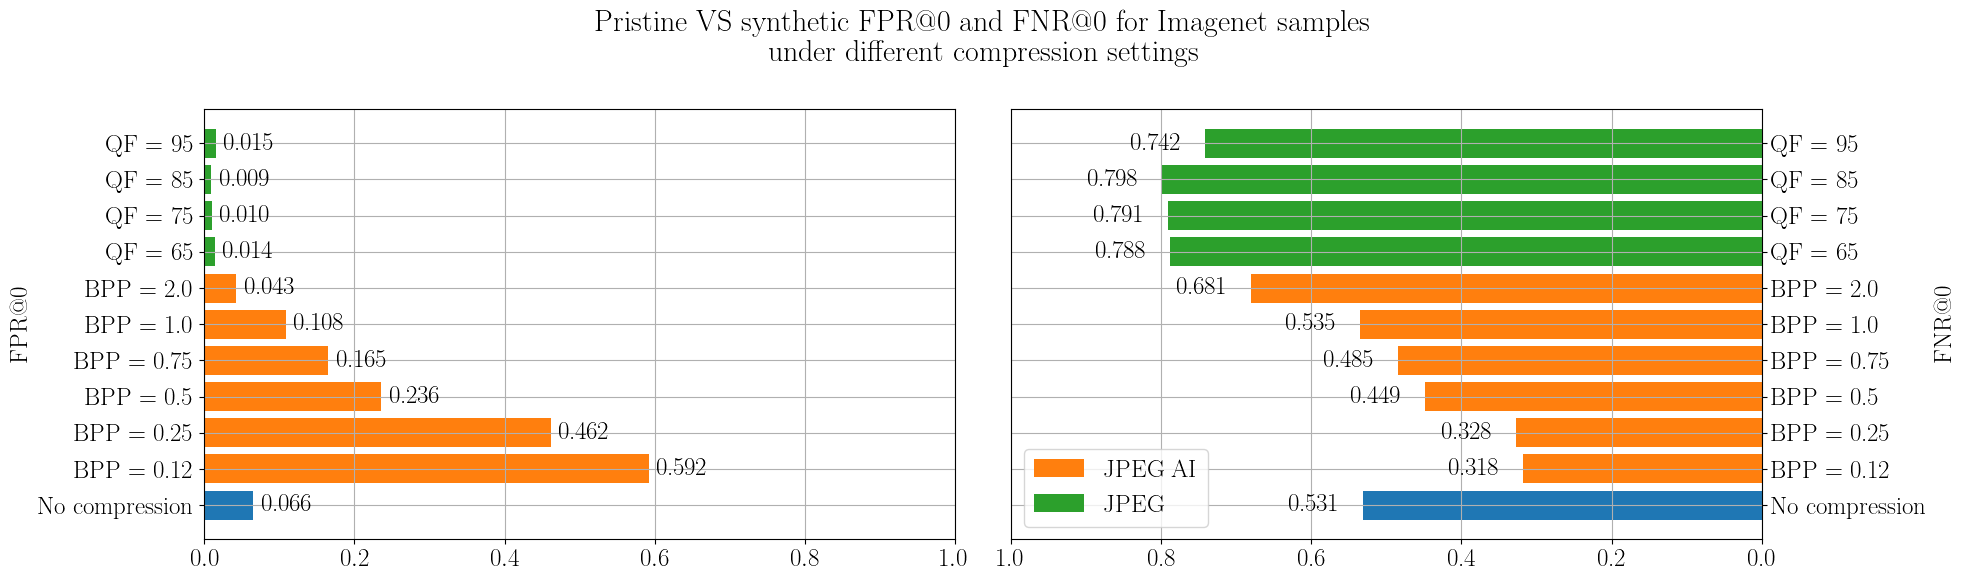

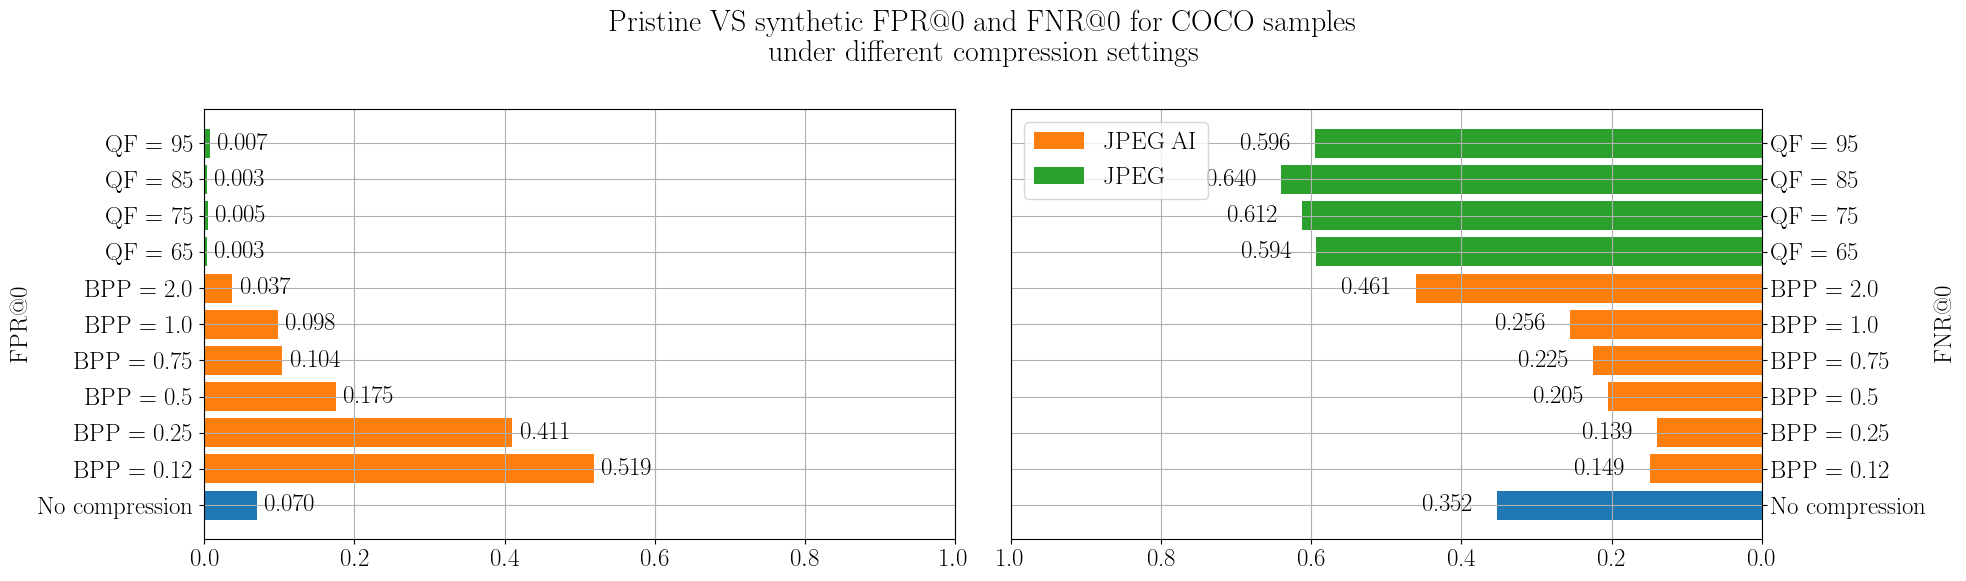

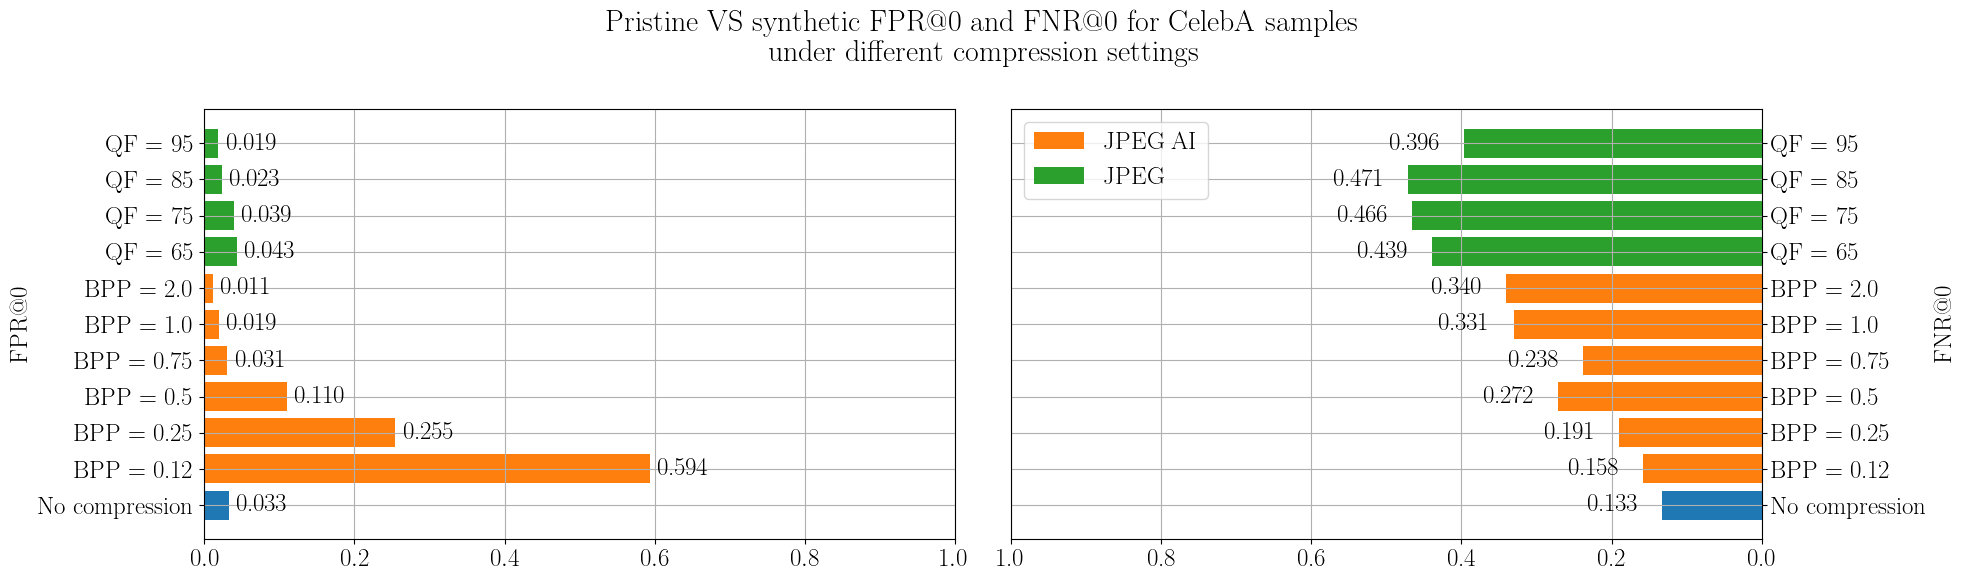

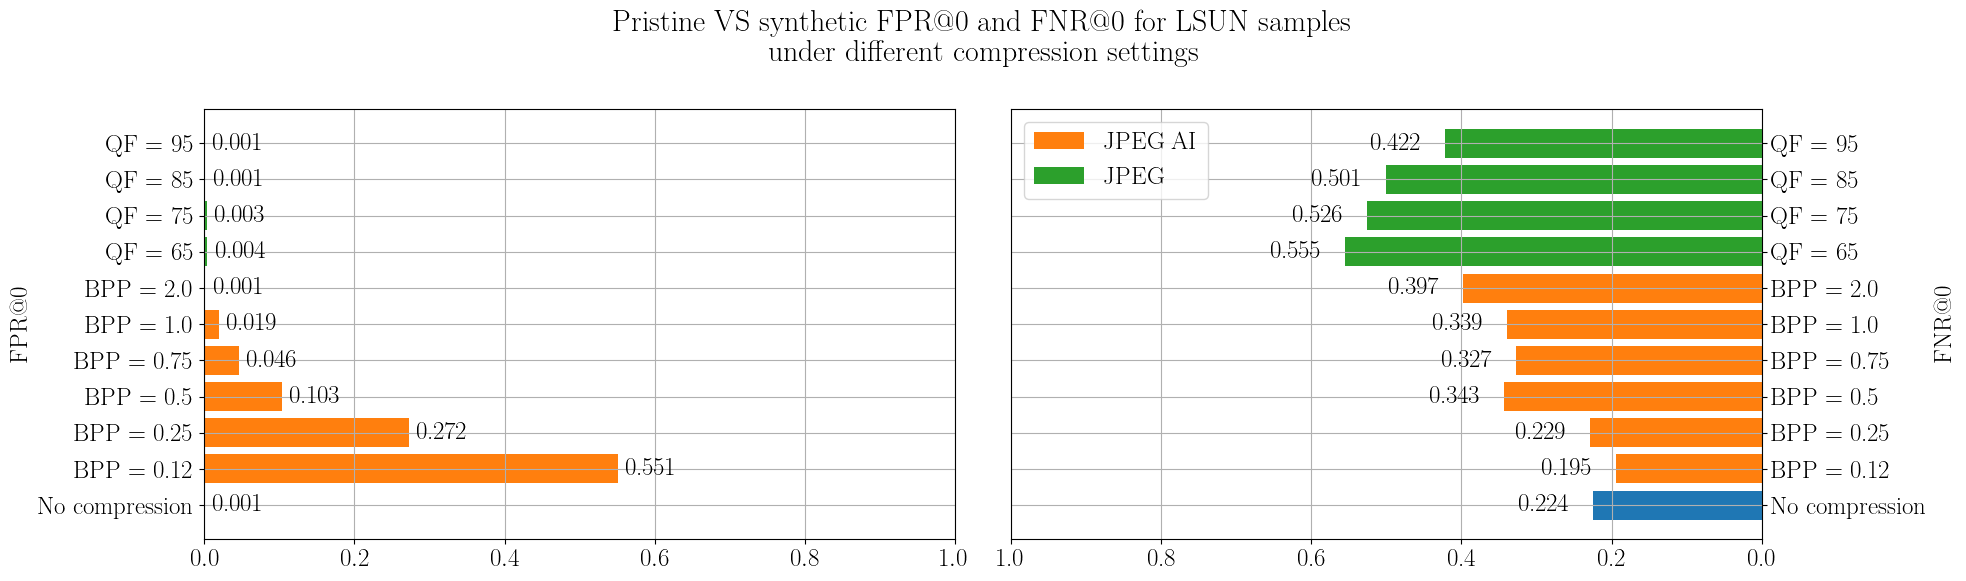

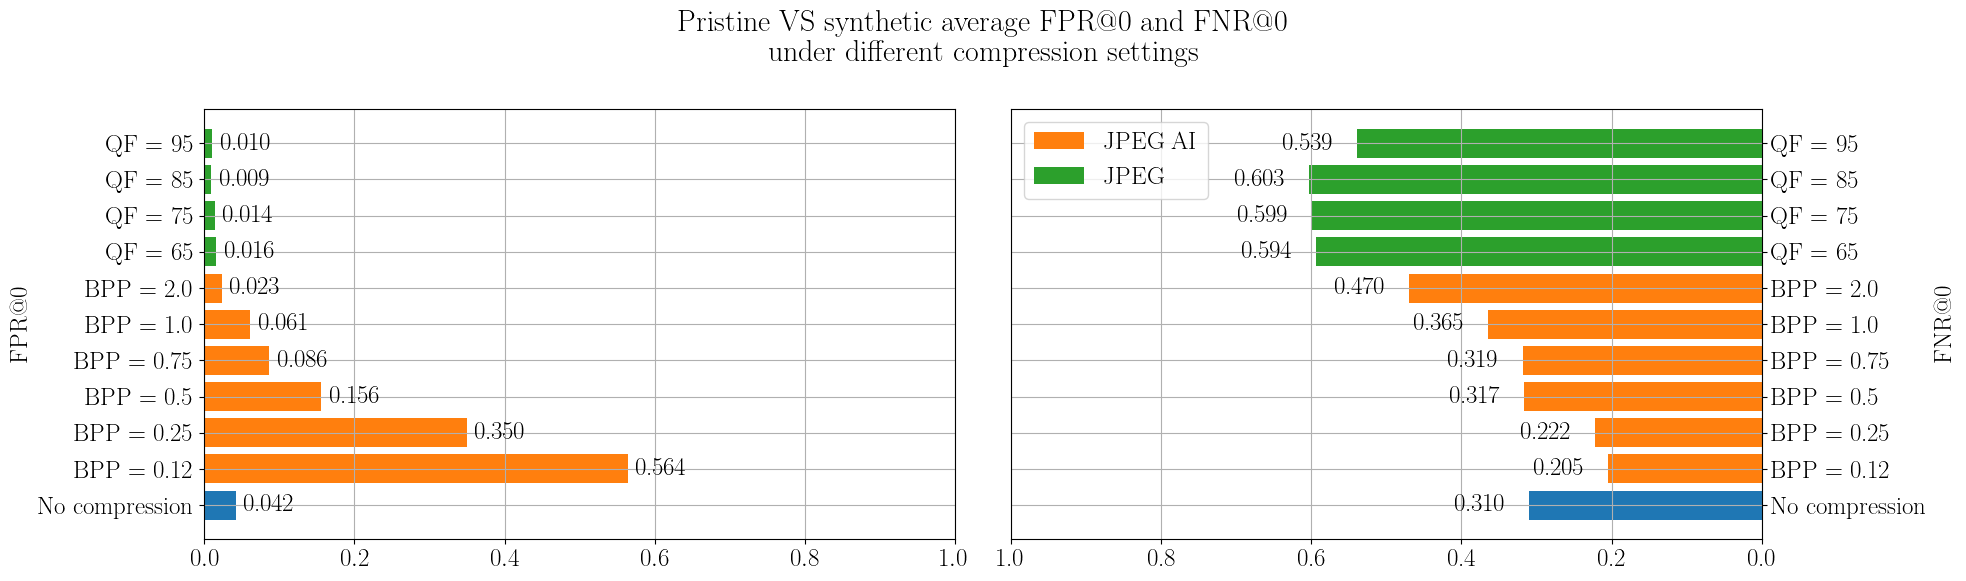

In [17]:
# Cycle over the datasets
for dataset in average_df.drop('All_images').index.get_level_values(0).unique():
    dis_df = average_df.loc[dataset]
    
    # Synth DF
    synth_df = dis_df.loc['Real_vs_Synth'].rename({'All': 'No compression'}, axis=0)
    # --- JPEG AI scenario
    jpegai_df = dis_df.loc['Real-JPEGAI_vs_Synth-JPEGAI'].drop('All')
    jpegai_df.rename({'0.12': 'BPP = 0.12', '0.25': 'BPP = 0.25', '0.5': 'BPP = 0.5',
                     '0.75': 'BPP = 0.75', '1.0': 'BPP = 1.0',
                     '2.0': 'BPP = 2.0'}, axis=0, inplace=True)
    jpegai_df.sort_index(inplace=True)
    # --- JPEG scenario
    jpeg_df = dis_df.loc['Real-JPEG_vs_Synth-JPEG'].drop('All')
    jpeg_df.sort_index(inplace=True)
    jpeg_df.rename({'65.0': 'QF = 65', '75.0': 'QF = 75', '85.0': 'QF = 85',
                     '95.0': 'QF = 95'}, axis=0, inplace=True)
    
    # --- Plot everything
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 6), layout='constrained')
    
    # FPR
    bars1 = ax1.barh(['No compression'], synth_df['fpr_thr0']['No compression'])
    bars2 = ax1.barh(jpegai_df.index, jpegai_df['fpr_thr0'], label='JPEG AI')
    bars3 = ax1.barh(jpeg_df.index, jpeg_df['fpr_thr0'], label='JPEG')
    
    # Add FPR values on top of each bar
    for bar in bars1:
        ax1.text(bar.get_width()+0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.3f}', va='center')
    for bar in bars2:
        ax1.text(bar.get_width()+0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.3f}', va='center')
    for bar in bars3:
        ax1.text(bar.get_width()+0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.3f}', va='center')
        
    # FNR
    bars1 = ax2.barh(['No compression'], -synth_df['fnr_thr0']['No compression'])
    bars2 = ax2.barh(jpegai_df.index, -jpegai_df['fnr_thr0'], label='JPEG AI')
    bars3 = ax2.barh(jpeg_df.index, -jpeg_df['fnr_thr0'], label='JPEG')
    
    # Add FNR values on top of each bar
    for bar in bars1:
        ax2.text(bar.get_width()-0.1, bar.get_y() + bar.get_height()/2, f'{-bar.get_width():.3f}', va='center')
    for bar in bars2:
        ax2.text(bar.get_width()-0.1, bar.get_y() + bar.get_height()/2, f'{-bar.get_width():.3f}', va='center')
    for bar in bars3:
        ax2.text(bar.get_width()-0.1, bar.get_y() + bar.get_height()/2, f'{-bar.get_width():.3f}', va='center')
        
    # Fix plot
    ax1.grid('on')
    ax2.grid('on')
    ax1.set_ylabel('FPR@0')
    ax2.set_ylabel('FNR@0')
    ax2.tick_params(axis='y', right=True, labelright=True, left=False, labelleft=False)
    ax2.yaxis.set_label_position('right')
    ax2.legend()
    if dataset == 'average':
        fig.suptitle(f'Pristine VS synthetic average FPR@0 and FNR@0 \nunder different compression settings')
    else:
        fig.suptitle(f'Pristine VS synthetic FPR@0 and FNR@0 for {dataset_labels[dataset]} samples \nunder different compression settings')
    # Adjusting the limits and ticks to make the plot look better
    ax1.set_xlim(0, 1)
    ax2.set_xlim(-1, 0)
    ax1.set_xticks(np.linspace(0, 1, 6))
    ax2.set_xticklabels([f'{x:.1f}' for x in np.linspace(1, 0, 6)])
    fig.tight_layout()
    plt.show()
